# Introduction

The aim of this notebook is to analyze the content of an e-commerce database that lists purchases by ∼ 4000 customers over a period of one year (from December 1st, 2010 to December 9th, 2011). Based on this analysis, I develop a model that makes it possible to anticipate a new customer's purchases in the following year, starting with the first purchase.

## Import the libraries

In [28]:
#For data Manipulation
import numpy as np
import pandas as pd

# For model building
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


# For data manipulation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [74]:
## load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [34]:
# Check if the dataframe contains some Nan values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Univariate Analysis

Let's get some insight into the variables.

Text(0.5, 1.0, 'Frequencies male/Female')

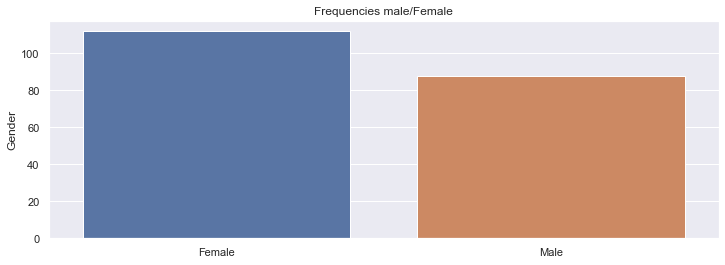

In [35]:
# Gender Variable
sns.set_theme()

g = sns.barplot( x=df.Gender.value_counts().index, y=df.Gender.value_counts())
g.set_title("Frequencies male/Female")

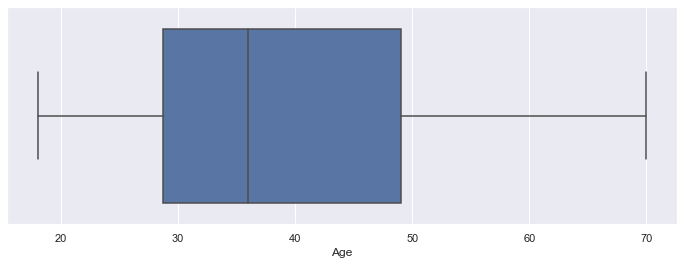

In [36]:
# Plot the Boxplot of the Age variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.boxplot(x = df["Age"])
plt.show()

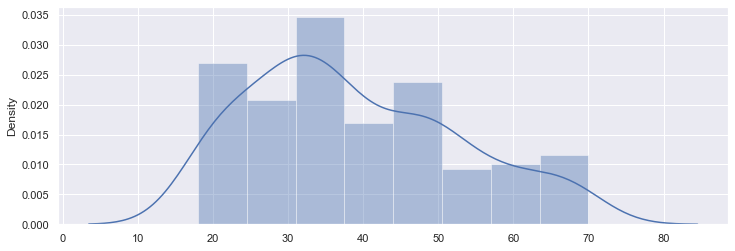

In [37]:
# Plot the distribution of the Age Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.distplot( x = df["Age"])
plt.show()

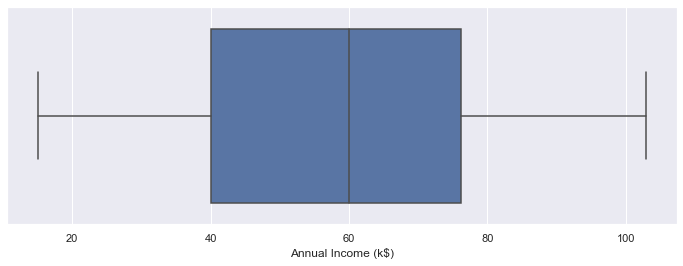

In [78]:
# Plot the Boxplot of the Annual income variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.boxplot(x = df["Annual Income (k$)"])
plt.show()

We see that we have one single outlier. Let's remove it (with the corresponding other variables).

In [77]:
#drop outliers that are bigger than mean + 2*std
df.drop(df[df["Annual Income (k$)"] > np.mean(df["Annual Income (k$)"]) + 2*np.std(df["Annual Income (k$)"])].index, inplace = True)

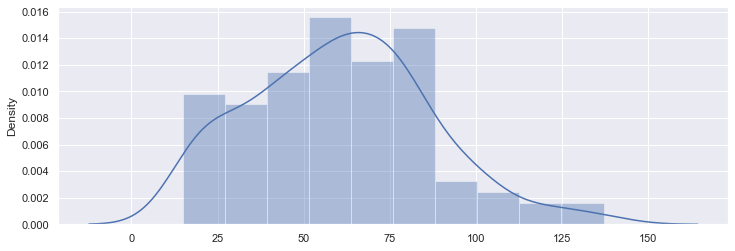

In [39]:
# Plot the distribution of the Annual Income Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.distplot( x = df["Annual Income (k$)"])
plt.show()

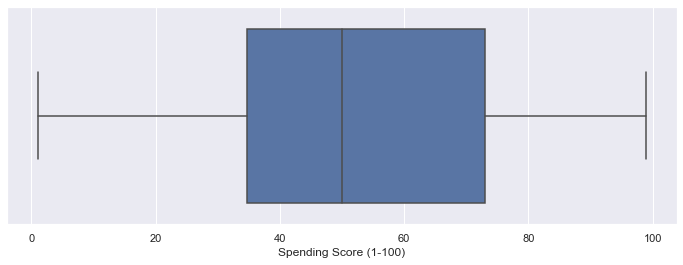

In [40]:
# Plot the Boxplot of the Spending Score variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.boxplot(x = df["Spending Score (1-100)"])
plt.show()

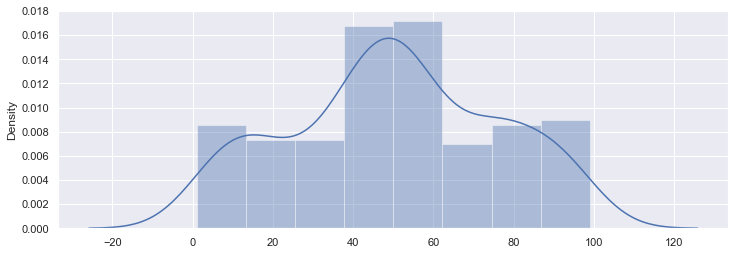

In [41]:
# Plot the distribution of the Spending Score Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.distplot( x = df["Spending Score (1-100)"])
plt.show()

In [85]:
# Encoding the categorical columns to numerical column values
# We will replace Female with 0 and Male with 1 

dic = {"Male":1, "Female":0}
df = df.replace(dic)

In [86]:
df.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.851859,-1.408634,-0.441502,1
1,-1.851859,-1.267403,1.210597,1
2,-1.808709,-1.338018,-1.739580,0
3,-1.808709,-1.126172,1.053254,0
4,-1.765559,-0.561247,-0.402167,0


## Standardizing variables

In [87]:
col = ["Annual Income (k$)", "Age", "Spending Score (1-100)"]
features = df[col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col)
df_temp = scaled_features

In [88]:
df_temp["Gender"] = df["Gender"]

In [89]:
df = df_temp
df.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.851859,-1.408634,-0.441502,1
1,-1.851859,-1.267403,1.210597,1
2,-1.808709,-1.338018,-1.739580,0
3,-1.808709,-1.126172,1.053254,0
4,-1.765559,-0.561247,-0.402167,0


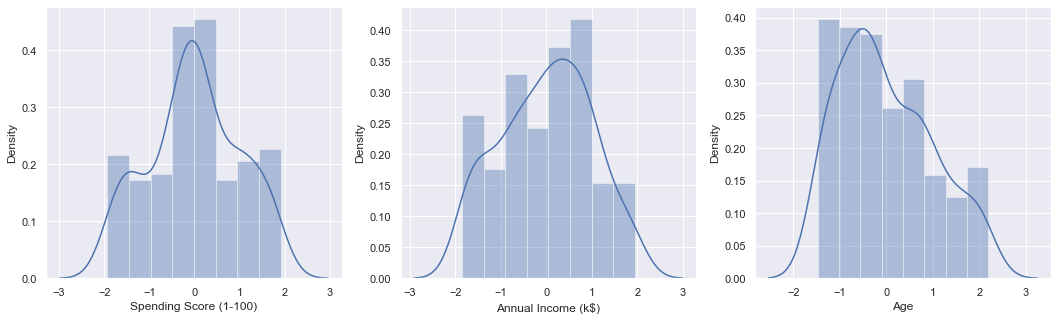

In [90]:
# Let's visualize our transformed data
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(df['Spending Score (1-100)'],ax=axes[0])
sns.distplot(df["Annual Income (k$)"],ax=axes[1])
sns.distplot(df["Age"],ax=axes[2])
plt.show()

## Elbow Method for optimal value of k in KMeans

In [91]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)

    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

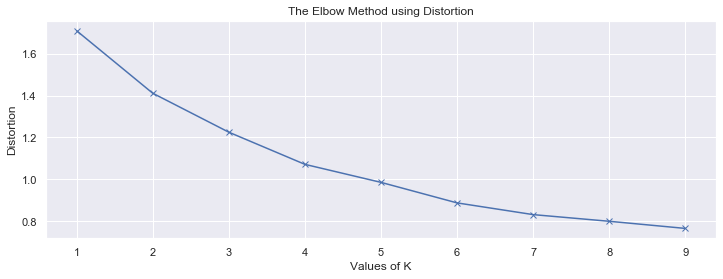

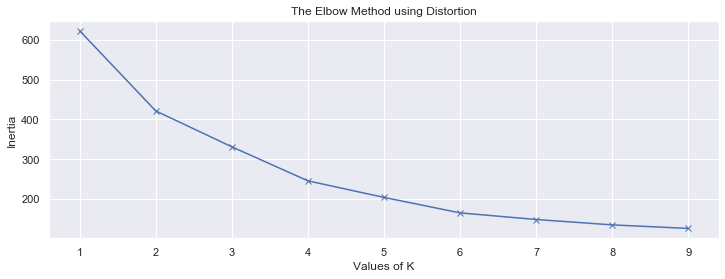

In [92]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion')
plt.show()

Using the graph above we suggest to use 4 clusters (since the decrease after 4 tends to become linear!).

## Model Building

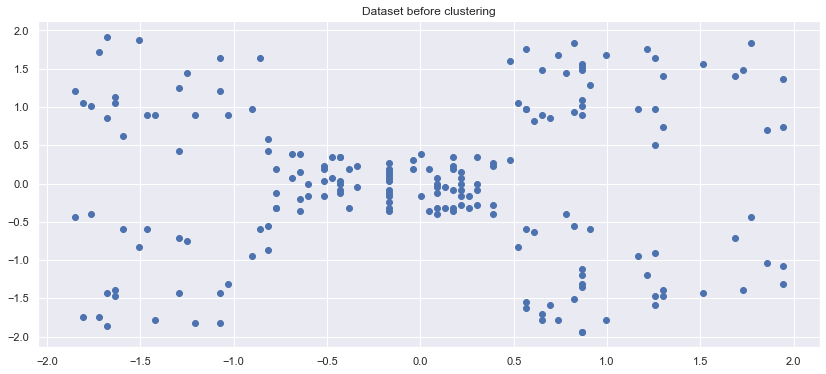

In [93]:
plt.figure(figsize=(14,6))
plt.title('Dataset before clustering')
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.show()

In [94]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
df["cluster"] = kmeans.labels_

In [56]:
df.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender,cluster
0,-1.738999,-1.424569,-0.434801,1,2
1,-1.738999,-1.281035,1.195704,1,2
2,-1.700830,-1.352802,-1.715913,0,2
3,-1.700830,-1.137502,1.040418,0,2
4,-1.662660,-0.563369,-0.395980,0,2


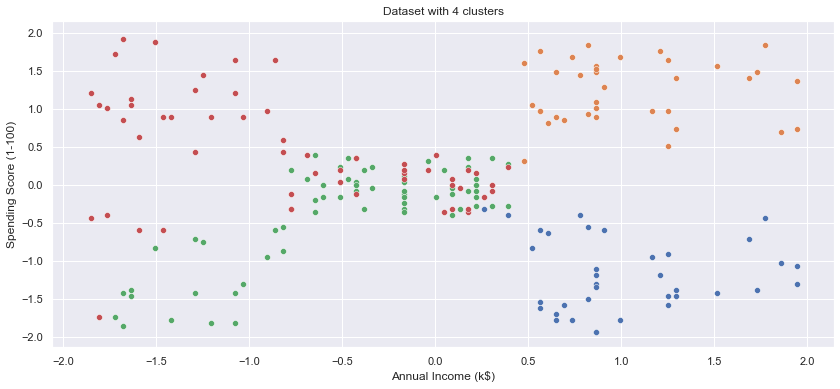

In [95]:
plt.figure(figsize=(14,6))
plt.title('Dataset with 4 clusters')
sns.scatterplot(x=df["Annual Income (k$)"][df['cluster']== 0],y=df["Spending Score (1-100)"][df['cluster'] == 0],palette=sns.color_palette("hls",10),data=df,
               legend="full")
sns.scatterplot(x=df["Annual Income (k$)"][df['cluster']== 1],y=df["Spending Score (1-100)"][df['cluster'] == 1],palette=sns.color_palette("hls",10),data=df,
               legend="full")
sns.scatterplot(x=df["Annual Income (k$)"][df['cluster'] == 2],y=df["Spending Score (1-100)"][df['cluster']== 2],palette=sns.color_palette("hls",10),data=df,
               legend="full")
sns.scatterplot(x=df["Annual Income (k$)"][df['cluster'] == 3],y=df["Spending Score (1-100)"][df['cluster'] == 3],palette=sns.color_palette("hls",10),data=df,
               legend="full")

plt.show()

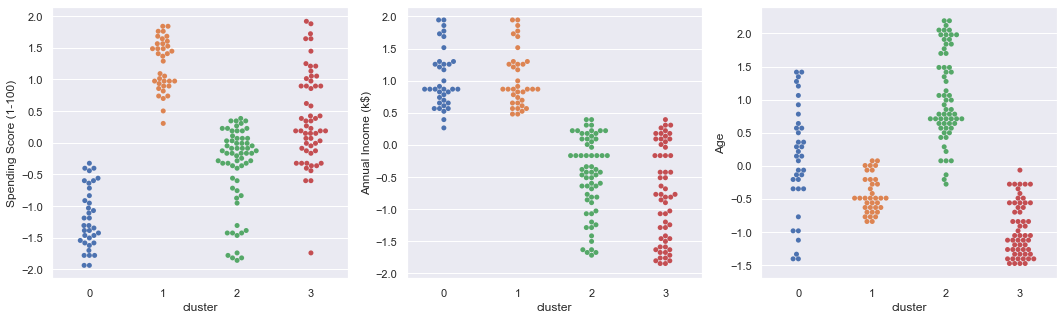

In [96]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.swarmplot(df.cluster,df['Spending Score (1-100)'],ax=axes[0])
sns.swarmplot(df.cluster,df["Annual Income (k$)"],ax=axes[1])
sns.swarmplot(df.cluster,df["Age"],ax=axes[2])
plt.show()